In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('../data/metric_data.csv')
df.head()

,Server name,Timestamp,DoM,CPU value,Memory value
0,Server1,01-Sep-22,1,0.07,0.86
1,Server1,02-Sep-22,2,0.25,0.89
2,Server1,03-Sep-22,3,0.17,0.91
3,Server1,04-Sep-22,4,0.15,0.97
4,Server1,05-Sep-22,5,0.01,0.95


In [76]:
df.groupby('Server name')['CPU value'].mean()

Server name
Server1     0.126
Server10    0.248
Server11    0.257
Server12    0.236
Server13    0.234
Server14    0.287
Server15    0.158
Server16    0.131
Server17    0.131
Server18    0.117
Server19    0.112
Server2     0.145
Server20    0.106
Server21    0.108
Server22    0.121
Server23    0.124
Server24    0.105
Server25    0.116
Server26    0.131
Server27    0.180
Server28    0.559
Server29    0.524
Server3     0.116
Server30    0.539
Server31    0.573
Server32    0.430
Server33    0.456
Server34    0.527
Server35    0.511
Server36    0.547
Server37    0.510
Server38    0.810
Server39    0.843
Server4     0.146
Server40    0.815
Server41    0.778
Server42    0.769
Server43    0.781
Server44    0.798
Server45    0.844
Server46    0.913
Server47    0.889
Server48    0.895
Server49    0.930
Server5     0.180
Server50    0.925
Server6     0.068
Server7     0.164
Server8     0.142
Server9     0.244
Name: CPU value, dtype: float64

In [77]:
df.groupby('Server name')['Memory value'].mean()[:5]

Server name
Server1     0.912
Server10    0.765
Server11    0.757
Server12    0.786
Server13    0.782
Name: Memory value, dtype: float64

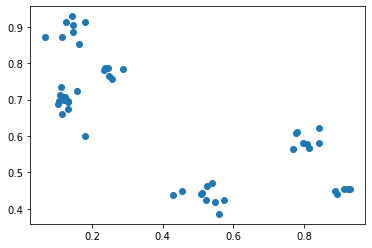

In [78]:
plt.scatter(df.groupby('Server name')['CPU value'].mean(),df.groupby('Server name')['Memory value'].mean())

In [79]:
server_name = list(df.groupby('Server name')['Memory value'].mean().index)
mem_val = list(df.groupby('Server name')['Memory value'].mean().values)
cpu_val = list(df.groupby('Server name')['CPU value'].mean().values)
cldf = pd.DataFrame({'server_name':server_name,
                    'mem_val':mem_val,
                    'cpu_val':cpu_val})
cldf.head()

,server_name,mem_val,cpu_val
0,Server1,0.912,0.126
1,Server10,0.765,0.248
2,Server11,0.757,0.257
3,Server12,0.786,0.236
4,Server13,0.782,0.234


In [80]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [81]:
agg_cls = AgglomerativeClustering(n_clusters=3)

agg_cls = agg_cls.fit(cldf.iloc[:,1:])


In [82]:
agg_cls.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0], dtype=int64)